# Lab. Exame
## CMC-13 Introdução à ciência de dados
Grupo:

        Felipe Sato

        Lucas Dias

        Valério Augusto
        
        Vinícius José de Menezes Pereira

## Preparação de dados

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
train =  pd.read_csv('exame_cmc13_dados_treinamento.csv', sep=";") 
test =  pd.read_csv('exame_cmc13_dados_teste.csv', sep=";")

*Data preparation*:
- first and second columns: wrong and useless (drop).
- user_id: ok, but I want to generalize the model (drop).
- age: ok (discretization).
- isbn: ok.
- rating: ok.
- book_title: ok but redundant, We just have isbn (drop).
- book_author: ok. 
- year_of_publication: ok. 
- publisher: ok. 
- img_l: ok, but it's redundant (isbn) and doesn't sees to be a importante feature (drop).
- Language: en and 9 likely as NA. Not enouth information, EN and 9 are nothing for learning. (drop)
- Category: ok and 9 is likely as NA. (Fixed)
- city: Redundant, We just have state for location, and with NA (drop).
- state: best choice for local, for it's more general than city. With NA. (Fixed)
- country: many NA, redundant, for We just have state for location, and hard to deal with (drop).

*Neural network*: just accepsts as inputs numerical inputs. Enconding with normalization solves this

*Split*: ok

*Some exploration*: 
- Most users are teenagers or young adults
- 'rating' is maybe disbalanced. Most values are shorter then 2
- 'Category' is disbalanced. Most categories are fiction or 9, which we supose to be missings values.


In [147]:
#define a city dict to fill na values
from collections import defaultdict
city_state = defaultdict(lambda: -1)
for key,line in train.loc[:,['city','state']].iterrows():
    if city_state[line.city] == -1:
        city_state[line.city] = line.state
    elif city_state[line.city] != line.state:
        city_state[line.city] = 1

for dataset in [train,test]:
    dataset.loc[:,'state'] = dataset.loc[:,'state'].replace(',',np.NAN)

In [148]:
for dataset in [train,test]:
    for key,line in dataset.fillna(101).iterrows():
        if line.state == 101 and line.city != 101:
            if city_state[line.city] != -1 and city_state[line.city] != 1:
                dataset.loc[key,'state'] = city_state[line.city] 

In [149]:
# columns 'Unnamed:0,1' and 'Unnamed:0' are useless
test.drop(['Unnamed: 0.1','Unnamed: 0','user_id','book_title','country','city','img_l','Language'],axis = 1, inplace = True)
train.drop(['Unnamed: 0.1','Unnamed: 0','user_id','book_title','country','city','img_l','Language'],axis = 1, inplace = True)

#drop na rows
for dataset in [train,test]:
    dataset.dropna(axis = 0,inplace = True)

In [150]:
# age discretization
def age_discretization(x):
    if x < 18: return 1
    elif x < 24: return 18
    elif x < 30: return 24
    elif x < 38: return 30
    elif x < 46: return 40
    elif x < 60: return 50
    else: return 60

train.loc[:,'age'] = train.loc[:,'age'].map(age_discretization)
test.loc[:,'age'] = test.loc[:,'age'].map(age_discretization)

In [151]:
# removing '*',',','_'
train = train.sort_values('state')
test = test.sort_values('state')
train = train.iloc[306:]
test = test.iloc[65:]

In [152]:
# removing ' ',',','-' and '.' inside the strings
train['state'] = train['state'].astype(str)
def replace_(s):
    s = s.replace('-','')
    s = s.replace(' ','')
    s = s.replace(',','')
    s = s.replace('.','')
    return s
train.loc[:,'state'] = train.loc[:,'state'].map(replace_)
test.loc[:,'state'] = test.loc[:,'state'].map(replace_)

In [153]:
def remove_test_lines(train,test):
    for s in test['state'].unique():
        t = train['state'].unique()
        if s not in t:
            test = test.loc[test['state']!=s]
    return test
test = remove_test_lines(train,test)

In [154]:
#normalizing year of publication
for dataset in [train,test]:
    dataset['year_of_publication'] = dataset['year_of_publication'] - dataset['year_of_publication'].min()

In [155]:
# Enconding
from sklearn.preprocessing import LabelEncoder

isbn_encoder = LabelEncoder()
isbn_encoder.fit(train.loc[:,'isbn'])
train.loc[:,'isbn'] = isbn_encoder.transform(train.loc[:,'isbn']) 
test.loc[:,'isbn'] = isbn_encoder.transform(test.loc[:,'isbn'])

book_author_encoder = LabelEncoder()
book_author_encoder.fit(train.loc[:,'book_author'])
train.loc[:,'book_author'] = book_author_encoder.transform(train.loc[:,'book_author']) 
test.loc[:,'book_author'] = book_author_encoder.transform(test.loc[:,'book_author'])

publisher_encoder = LabelEncoder()
publisher_encoder.fit(train.loc[:,'publisher'])
train.loc[:,'publisher'] = publisher_encoder.transform(train.loc[:,'publisher']) 
test.loc[:,'publisher'] = publisher_encoder.transform(test.loc[:,'publisher'])

category_encoder = LabelEncoder()
category_encoder.fit(train.loc[:,'Category'])
train.loc[:,'Category'] = category_encoder.transform(train.loc[:,'Category']) 
test.loc[:,'Category'] = category_encoder.transform(test.loc[:,'Category'])

state_encoder = LabelEncoder()
state_encoder.fit(train.loc[:,'state'])
train.loc[:,'state'] = state_encoder.transform(train.loc[:,'state']) 
test.loc[:,'state'] = state_encoder.transform(test.loc[:,'state'])

In [156]:
# 
test.loc[:,'year_of_publication'] = test.loc[:,'year_of_publication'].map(lambda x: int(x[:4]) if type(x) == str else int(x))
test.loc[:,'year_of_publication'] = test.loc[:,'year_of_publication'].map(lambda x: int(x[:4]) if type(x) == str else int(x))

In [157]:
# resenting indices
train = train.reset_index()
train = train.drop('index',axis = 1)
test = test.reset_index()
test = test.drop('index',axis = 1)

In [158]:
# # normalization of 'isbn','book_author','publisher','category' and 'state'
# for feature in train.columns:
#     test[feature] = test[feature]/train[feature].max()
#     train[feature] = train[feature]/train[feature].max()

In [159]:
# split
Y_train = train['rating']
X_train = train.drop('rating',axis = 1)
Y_test = test['rating']
X_test = test.drop('rating',axis = 1)

##  Exploration

32.74064577397911

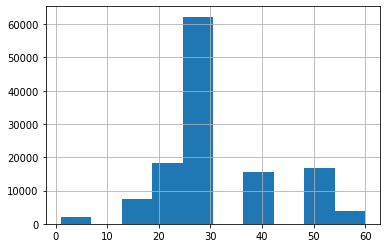

In [160]:
train['age'].hist()
train['age'].mean()

3.16488603988604

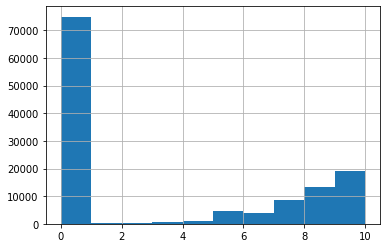

In [161]:
train['rating'].hist()
train['rating'].mean()

<AxesSubplot:>

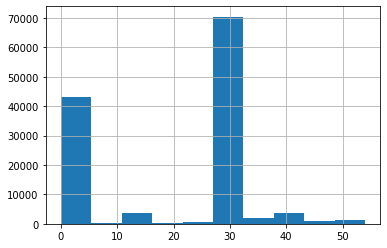

In [162]:
train['Category'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x2631e11c670>,
 'caps': [<matplotlib.lines.Line2D at 0x2631e11cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2631e11c4c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2631e11f1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2631e11f4c0>,
 'means': []}

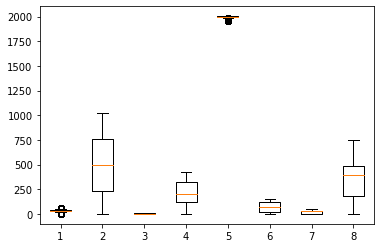

In [163]:
plt.boxplot(train)

## Modelo baseado em árvores de decisão ou Random Forests

In [164]:
y_train = Y_train.copy()
x_train = X_train.copy()
y_test = Y_test.copy()
x_test = X_test.copy()

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import math

In [168]:
for qtd_estimators in range(len(x_test.columns)):
    model = RandomForestClassifier(n_estimators=qtd_estimators+1,criterion = 'gini')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'n_estimators: {qtd_estimators+1}, chi_2: {round(math.sqrt((y_pred - y_test).dot(y_pred - y_test)),2)}, acurracy: {round(accuracy_score(y_test,y_pred),2)}')

n_estimators: 1, chi_2: 966.11, acurracy: 0.42
n_estimators: 2, chi_2: 936.33, acurracy: 0.47
n_estimators: 3, chi_2: 952.37, acurracy: 0.45
n_estimators: 4, chi_2: 946.64, acurracy: 0.46
n_estimators: 5, chi_2: 947.94, acurracy: 0.46
n_estimators: 6, chi_2: 949.52, acurracy: 0.46
n_estimators: 7, chi_2: 950.43, acurracy: 0.46


In [139]:
#Vamos ver se com um numero mundo grande mudaria muito a acuracia
model = RandomForestClassifier(n_estimators=500,criterion = 'gini')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'n_estimators: {500}, chi_2: {round(math.sqrt((y_pred - y_test).dot(y_pred - y_test)),2)}, acurracy: {round(accuracy_score(y_test,y_pred),2)}')

n_estimators: 500, chi_2: 947.35, acurracy: 0.47


In [166]:
#Acuracia igual, mas chi2 pior, então o melhor modelo é com duas árvores.
#Vamos calcular alguns parametros para comparar com a rede neural
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

model = RandomForestClassifier(n_estimators=2,criterion = 'gini')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'n_estimators: {qtd_estimators+1}, chi_2: {round(math.sqrt((y_pred - y_test).dot(y_pred - y_test)),2)}, acurracy: {round(accuracy_score(y_test,y_pred),2)}')
print(f'kappa_score: {round(cohen_kappa_score(y_test, y_pred),2)},\nf1_score: {f1_score(y_test, y_pred, average=None)}')

n_estimators: 7, chi_2: 936.03, acurracy: 0.47
kappa_score: 0.03,
f1_score: [0.66841992 0.         0.         0.01454545 0.00934579 0.04473161
 0.02433372 0.05943775 0.09707326 0.08459052 0.09093369]


ate aqui ta tudo certo

## Modelo baseado em redes neurais do tipo MLP

In [155]:
y_train = Y_train.copy()
x_train = X_train.copy()
y_test = Y_test.copy()
x_test = X_test.copy()

In [70]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(300,300,300,300,300,300,300,300,300,300), activation='relu', solver='adam', max_iter=500)

In [157]:
nn.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300, 300, 300,
                                  300),
              max_iter=500)

In [182]:
y_pred = nn.predict(x_test)
nn.score(x_test, y_test)

In [184]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average=None))

[0.74519806 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03881188]


In [185]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average=None))

[0.9980253  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02027307]


In [186]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None))

[0.59457569 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.4537037 ]


C:\Users\vinic\anaconda3\envs\ct213\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_pred))

[[74795     0     0     0     0     0     0     0     4     0   115]
 [  192     0     0     0     0     0     0     0     0     0     0]
 [  331     0     0     0     0     0     0     0     0     0     0]
 [  642     0     0     0     0     0     0     0     0     0     1]
 [  937     0     0     0     0     0     0     0     0     0     1]
 [ 4577     0     0     0     0     0     0     0     0     0     5]
 [ 3863     0     0     0     0     0     0     0     1     0     6]
 [ 8633     0     0     0     0     0     0     0     3     0    15]
 [13098     0     0     0     0     0     0     0     6     0    37]
 [ 9355     0     0     0     0     0     0     0     4     0    56]
 [ 9492     0     0     0     0     0     0     0     0     0   191]]


In [187]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.005380801002342062